In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest, f_regression
#from fastai.imports import *
#from fastai.structured import *
#from fastai.imports import rf_feat_importance
%matplotlib inline

In [2]:
df = pd.read_csv('LoansTrainingSet (1).csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            245508 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [4]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [5]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [6]:
df.drop_duplicates(keep=False, inplace=True)

In [7]:
#d={'Fully Paid':0,'Charged Off':1}
#df['Loan Status'] = df['Loan Status'].map(d)
df["Loan Status"] = df['Loan Status'].apply(lambda x: 1 if x=='Charged Off' else 0)

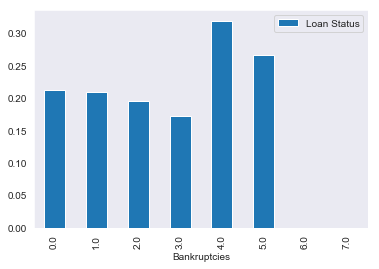

In [8]:
bankRuptcies = df.pivot_table(index="Bankruptcies",values="Loan Status")
bankRuptcies.plot.bar()
plt.show()

In [9]:
df['Number of Credit Problems'].unique()

array([ 0,  1,  2,  5,  3,  4,  6,  7,  9, 10,  8, 11])

In [10]:
df['CreditProblem']= df['Number of Credit Problems'].apply(lambda x: 1 if x>1 else 0)

In [11]:
df.CreditProblem.unique()

array([0, 1])

In [12]:
abs(df.corr()).sort_values(by="Loan Status",ascending=False)

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,CreditProblem
Loan Status,1.000000,0.224536,0.582991,0.069157,0.034631,0.019890,0.019772,0.007466,0.009211,0.003188,0.012373,0.006234
Credit Score,0.582991,0.149214,1.000000,0.038918,0.016742,0.014361,0.010393,0.001788,0.003200,0.003675,0.006246,0.000880
Current Loan Amount,0.224536,1.000000,0.149214,0.019814,0.013352,0.001356,0.001712,0.001255,0.002864,0.004260,0.002419,0.000300
Annual Income,0.069157,0.019814,0.038918,1.000000,0.168136,0.056205,0.157126,0.019108,0.327602,0.050642,0.038908,0.008803
Years of Credit History,0.034631,0.013352,0.016742,0.168136,1.000000,0.037682,0.128512,0.060490,0.200630,0.061935,0.020015,0.022482
Months since last delinquent,0.019890,0.001356,0.014361,0.056205,0.037682,1.000000,0.034747,0.091530,0.024577,0.115103,0.003128,0.045025
Number of Open Accounts,0.019772,0.001712,0.010393,0.157126,0.128512,0.034747,1.000000,0.014572,0.219739,0.023615,0.006083,0.006420
Tax Liens,0.012373,0.002419,0.006246,0.038908,0.020015,0.003128,0.006083,0.581433,0.012191,0.049578,1.000000,0.554064
Current Credit Balance,0.009211,0.002864,0.003200,0.327602,0.200630,0.024577,0.219739,0.104925,1.000000,0.118303,0.012191,0.040297
Number of Credit Problems,0.007466,0.001255,0.001788,0.019108,0.060490,0.091530,0.014572,1.000000,0.104925,0.761887,0.581433,0.661890


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


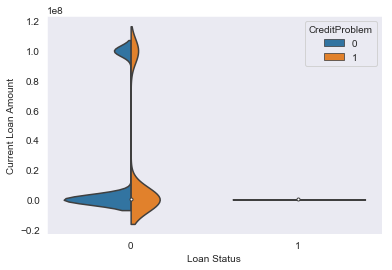

In [13]:
sns.violinplot(x='Loan Status', y='Current Loan Amount', hue='CreditProblem',data=df,split=True)

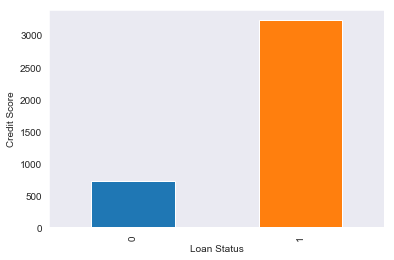

In [14]:
#people with higher score has a better change to charged off.
ax = plt.subplot()
ax.set_ylabel('Credit Score')
df.groupby('Loan Status').mean()['Credit Score'].plot(kind='bar',ax=ax)

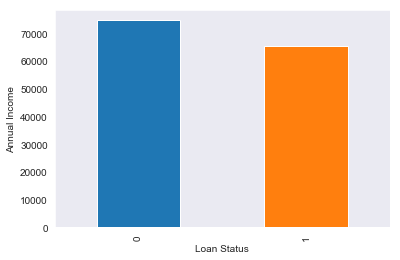

In [15]:
#people with higher salary has a better changes to pay.
ax = plt.subplot()
ax.set_ylabel('Annual Income')
df.groupby('Loan Status').mean()['Annual Income'].plot(kind='bar',ax=ax)

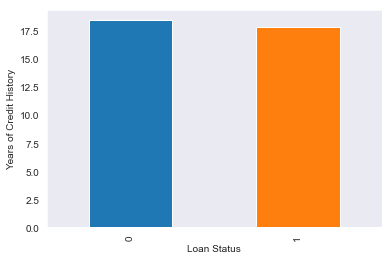

In [16]:
#People with more years of credit history had a better chance to pay.
ax = plt.subplot()
ax.set_ylabel('Years of Credit History')
df.groupby('Loan Status').mean()['Years of Credit History'].plot(kind='bar',ax=ax)

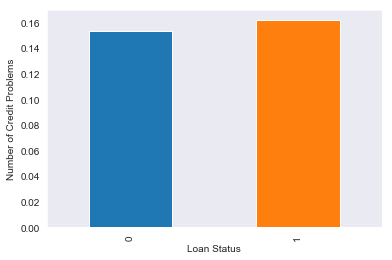

In [17]:
#People with more number of accounts has more charged off problems.
ax = plt.subplot()
ax.set_ylabel('Number of Credit Problems')
df.groupby('Loan Status').mean()['Number of Credit Problems'].plot(kind='bar',ax=ax)

<h1> Featuring Engineering</h1>

In [18]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     57016
Years in current job              9412
Home Ownership                       0
Annual Income                    57016
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    122473
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       455
Tax Liens                           23
CreditProblem                        0
dtype: int64

In [19]:
df.corr().abs().sort_values(by='Credit Score',ascending=False) 
#don't use target variable to fill missing values

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,CreditProblem
Credit Score,0.582991,0.149214,1.000000,0.038918,0.016742,0.014361,0.010393,0.001788,0.003200,0.003675,0.006246,0.000880
Loan Status,1.000000,0.224536,0.582991,0.069157,0.034631,0.019890,0.019772,0.007466,0.009211,0.003188,0.012373,0.006234
Current Loan Amount,0.224536,1.000000,0.149214,0.019814,0.013352,0.001356,0.001712,0.001255,0.002864,0.004260,0.002419,0.000300
Annual Income,0.069157,0.019814,0.038918,1.000000,0.168136,0.056205,0.157126,0.019108,0.327602,0.050642,0.038908,0.008803
Years of Credit History,0.034631,0.013352,0.016742,0.168136,1.000000,0.037682,0.128512,0.060490,0.200630,0.061935,0.020015,0.022482
Months since last delinquent,0.019890,0.001356,0.014361,0.056205,0.037682,1.000000,0.034747,0.091530,0.024577,0.115103,0.003128,0.045025
Number of Open Accounts,0.019772,0.001712,0.010393,0.157126,0.128512,0.034747,1.000000,0.014572,0.219739,0.023615,0.006083,0.006420
Tax Liens,0.012373,0.002419,0.006246,0.038908,0.020015,0.003128,0.006083,0.581433,0.012191,0.049578,1.000000,0.554064
Bankruptcies,0.003188,0.004260,0.003675,0.050642,0.061935,0.115103,0.023615,0.761887,0.118303,1.000000,0.049578,0.327675
Current Credit Balance,0.009211,0.002864,0.003200,0.327602,0.200630,0.024577,0.219739,0.104925,1.000000,0.118303,0.012191,0.040297


In [20]:
df['Credit Score'] = df['Credit Score'].apply(lambda x: (x/10) if x >800 else x)
df['Credit Score'].isnull().sum()

57016

In [21]:
df['Credit Score'].fillna(df['Credit Score'].mean(),inplace=True)

In [22]:
df.corr().abs().sort_values(by='Loan Status',ascending=False)

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,CreditProblem
Loan Status,1.000000,0.224536,0.198404,0.069157,0.034631,0.019890,0.019772,0.007466,0.009211,0.003188,0.012373,0.006234
Current Loan Amount,0.224536,1.000000,0.055193,0.019814,0.013352,0.001356,0.001712,0.001255,0.002864,0.004260,0.002419,0.000300
Credit Score,0.198404,0.055193,1.000000,0.017179,0.075515,0.040078,0.033284,0.052508,0.010828,0.040456,0.023557,0.031975
Annual Income,0.069157,0.019814,0.017179,1.000000,0.168136,0.056205,0.157126,0.019108,0.327602,0.050642,0.038908,0.008803
Years of Credit History,0.034631,0.013352,0.075515,0.168136,1.000000,0.037682,0.128512,0.060490,0.200630,0.061935,0.020015,0.022482
Months since last delinquent,0.019890,0.001356,0.040078,0.056205,0.037682,1.000000,0.034747,0.091530,0.024577,0.115103,0.003128,0.045025
Number of Open Accounts,0.019772,0.001712,0.033284,0.157126,0.128512,0.034747,1.000000,0.014572,0.219739,0.023615,0.006083,0.006420
Tax Liens,0.012373,0.002419,0.023557,0.038908,0.020015,0.003128,0.006083,0.581433,0.012191,0.049578,1.000000,0.554064
Current Credit Balance,0.009211,0.002864,0.010828,0.327602,0.200630,0.024577,0.219739,0.104925,1.000000,0.118303,0.012191,0.040297
Number of Credit Problems,0.007466,0.001255,0.052508,0.019108,0.060490,0.091530,0.014572,1.000000,0.104925,0.761887,0.581433,0.661890


In [23]:
df.describe()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,CreditProblem
count,223766.000000,2.237660e+05,223766.000000,1.667500e+05,223766.000000,101293.000000,223766.000000,223766.000000,2.237660e+05,223311.000000,223743.000000,223766.000000
mean,0.212610,1.574685e+07,723.121751,7.292428e+04,18.333506,35.005657,11.087176,0.155229,1.542883e+04,0.110021,0.026665,0.016446
std,0.409155,3.640826e+07,22.940285,5.350305e+04,7.058261,21.832351,4.968702,0.457870,1.993524e+04,0.336114,0.242329,0.127182
min,0.000000,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,8.303000e+03,721.000000,4.483800e+04,13.600000,16.000000,8.000000,0.000000,5.944000e+03,0.000000,0.000000,0.000000
50%,0.000000,1.459900e+04,723.121751,6.233200e+04,17.000000,32.000000,10.000000,0.000000,1.103400e+04,0.000000,0.000000,0.000000
75%,0.000000,2.494800e+04,739.000000,8.801050e+04,21.800000,51.000000,14.000000,0.000000,1.931075e+04,0.000000,0.000000,0.000000
max,1.000000,1.000000e+08,751.000000,7.523240e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223766 entries, 0 to 256983
Data columns (total 20 columns):
Loan ID                         223766 non-null object
Customer ID                     223766 non-null object
Loan Status                     223766 non-null int64
Current Loan Amount             223766 non-null int64
Term                            223766 non-null object
Credit Score                    223766 non-null float64
Years in current job            214354 non-null object
Home Ownership                  223766 non-null object
Annual Income                   166750 non-null float64
Purpose                         223766 non-null object
Monthly Debt                    223766 non-null object
Years of Credit History         223766 non-null float64
Months since last delinquent    101293 non-null float64
Number of Open Accounts         223766 non-null int64
Number of Credit Problems       223766 non-null int64
Current Credit Balance          223766 non-null int64
Maximum Op

In [25]:
df['Years in current job'].unique()

array(['10+ years', '4 years', '6 years', '5 years', nan, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [26]:
df['Years in current job'] = df['Years in current job'].astype(str).apply(lambda x: x.replace('years',''))
df['Years in current job'] = df['Years in current job'].astype(str).apply(lambda x: x.replace('year',''))
df['Years in current job'] = df['Years in current job'].astype(str).apply(lambda x: x.replace('+',''))
df['Years in current job'] = df['Years in current job'].astype(str).apply(lambda x: x.replace(' ',''))
df['Years in current job'].unique()

array(['10', '4', '6', '5', 'nan', '3', '2', '<1', '1', '7', '9', '8'],
      dtype=object)

In [27]:
df['Years in current job'] = df['Years in current job'].astype(str).apply(lambda x: x.replace('<1','0.5'))
df['Years in current job'].unique()

array(['10', '4', '6', '5', 'nan', '3', '2', '0.5', '1', '7', '9', '8'],
      dtype=object)

In [28]:
df['Years in current job'] = df['Years in current job'].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223766 entries, 0 to 256983
Data columns (total 20 columns):
Loan ID                         223766 non-null object
Customer ID                     223766 non-null object
Loan Status                     223766 non-null int64
Current Loan Amount             223766 non-null int64
Term                            223766 non-null object
Credit Score                    223766 non-null float64
Years in current job            214354 non-null float64
Home Ownership                  223766 non-null object
Annual Income                   166750 non-null float64
Purpose                         223766 non-null object
Monthly Debt                    223766 non-null object
Years of Credit History         223766 non-null float64
Months since last delinquent    101293 non-null float64
Number of Open Accounts         223766 non-null int64
Number of Credit Problems       223766 non-null int64
Current Credit Balance          223766 non-null int64
Maximum O

In [30]:
df.corr().abs().sort_values(by='Years in current job',ascending=False)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,CreditProblem
Years in current job,0.005121,0.005926,0.013949,1.000000,0.074937,0.228549,0.006267,0.047707,0.043562,0.090253,0.045849,0.008957,0.011690
Years of Credit History,0.034631,0.013352,0.075515,0.228549,0.168136,1.000000,0.037682,0.128512,0.060490,0.200630,0.061935,0.020015,0.022482
Current Credit Balance,0.009211,0.002864,0.010828,0.090253,0.327602,0.200630,0.024577,0.219739,0.104925,1.000000,0.118303,0.012191,0.040297
Annual Income,0.069157,0.019814,0.017179,0.074937,1.000000,0.168136,0.056205,0.157126,0.019108,0.327602,0.050642,0.038908,0.008803
Number of Open Accounts,0.019772,0.001712,0.033284,0.047707,0.157126,0.128512,0.034747,1.000000,0.014572,0.219739,0.023615,0.006083,0.006420
Bankruptcies,0.003188,0.004260,0.040456,0.045849,0.050642,0.061935,0.115103,0.023615,0.761887,0.118303,1.000000,0.049578,0.327675
Number of Credit Problems,0.007466,0.001255,0.052508,0.043562,0.019108,0.060490,0.091530,0.014572,1.000000,0.104925,0.761887,0.581433,0.661890
Credit Score,0.198404,0.055193,1.000000,0.013949,0.017179,0.075515,0.040078,0.033284,0.052508,0.010828,0.040456,0.023557,0.031975
CreditProblem,0.006234,0.000300,0.031975,0.011690,0.008803,0.022482,0.045025,0.006420,0.661890,0.040297,0.327675,0.554064,1.000000
Tax Liens,0.012373,0.002419,0.023557,0.008957,0.038908,0.020015,0.003128,0.006083,0.581433,0.012191,0.049578,1.000000,0.554064


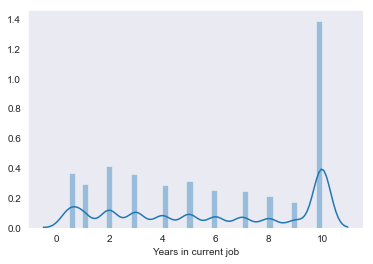

In [31]:
x = df['Years in current job'][df['Years in current job']>0]
sns.distplot(x);

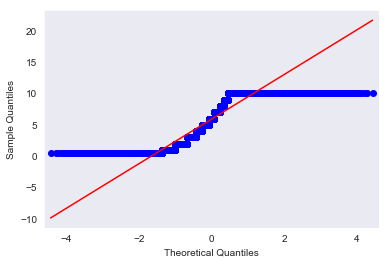

In [32]:
qqplot(x, line='s')
plt.show()

In [33]:
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.861, p=0.000
Sample does not look Gaussian (reject H0)


/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [34]:
df['Years in current job'].fillna(df['Years in current job'].median(),inplace=True)

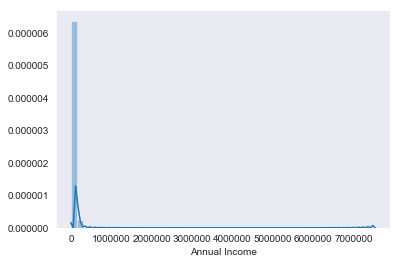

In [35]:
x = df['Annual Income'][df['Annual Income']>0]
sns.distplot(x);

In [36]:
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.573, p=0.000
Sample does not look Gaussian (reject H0)


/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


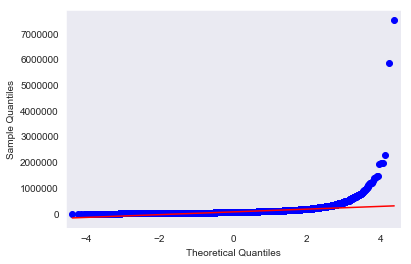

In [37]:
qqplot(x, line='s')
plt.show()
#Is possible to delete outliers to create a better fit to the model

In [38]:
df['Annual Income'].fillna(df['Annual Income'].median(),inplace=True)

In [39]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job                 0
Home Ownership                       0
Annual Income                        0
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    122473
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       455
Tax Liens                           23
CreditProblem                        0
dtype: int64

In [40]:
df.corr().abs().sort_values(by='Months since last delinquent',ascending=False)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,CreditProblem
Months since last delinquent,0.019890,0.001356,0.040078,0.006309,0.048220,0.037682,1.000000,0.034747,0.091530,0.024577,0.115103,0.003128,0.045025
Bankruptcies,0.003188,0.004260,0.040456,0.044323,0.043338,0.061935,0.115103,0.023615,0.761887,0.118303,1.000000,0.049578,0.327675
Number of Credit Problems,0.007466,0.001255,0.052508,0.042164,0.016219,0.060490,0.091530,0.014572,1.000000,0.104925,0.761887,0.581433,0.661890
Annual Income,0.064383,0.044202,0.017094,0.063395,1.000000,0.144367,0.048220,0.134395,0.016219,0.268783,0.043338,0.033573,0.007755
CreditProblem,0.006234,0.000300,0.031975,0.011353,0.007755,0.022482,0.045025,0.006420,0.661890,0.040297,0.327675,0.554064,1.000000
Credit Score,0.198404,0.055193,1.000000,0.013675,0.017094,0.075515,0.040078,0.033284,0.052508,0.010828,0.040456,0.023557,0.031975
Years of Credit History,0.034631,0.013352,0.075515,0.217018,0.144367,1.000000,0.037682,0.128512,0.060490,0.200630,0.061935,0.020015,0.022482
Number of Open Accounts,0.019772,0.001712,0.033284,0.046543,0.134395,0.128512,0.034747,1.000000,0.014572,0.219739,0.023615,0.006083,0.006420
Current Credit Balance,0.009211,0.002864,0.010828,0.088648,0.268783,0.200630,0.024577,0.219739,0.104925,1.000000,0.118303,0.012191,0.040297
Loan Status,1.000000,0.224536,0.198404,0.004774,0.064383,0.034631,0.019890,0.019772,0.007466,0.009211,0.003188,0.012373,0.006234


In [41]:
df['Months since last delinquent'].fillna(df['Months since last delinquent'].median(),inplace=True)

In [42]:
df.isnull().sum()

Loan ID                           0
Customer ID                       0
Loan Status                       0
Current Loan Amount               0
Term                              0
Credit Score                      0
Years in current job              0
Home Ownership                    0
Annual Income                     0
Purpose                           0
Monthly Debt                      0
Years of Credit History           0
Months since last delinquent      0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                    455
Tax Liens                        23
CreditProblem                     0
dtype: int64

In [43]:
df.corr().abs().sort_values(by='Bankruptcies',ascending=False)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,CreditProblem
Bankruptcies,0.003188,0.004260,0.040456,0.044323,0.043338,0.061935,0.078149,0.023615,0.761887,0.118303,1.000000,0.049578,0.327675
Number of Credit Problems,0.007466,0.001255,0.052508,0.042164,0.016219,0.060490,0.071144,0.014572,1.000000,0.104925,0.761887,0.581433,0.661890
CreditProblem,0.006234,0.000300,0.031975,0.011353,0.007755,0.022482,0.038466,0.006420,0.661890,0.040297,0.327675,0.554064,1.000000
Current Credit Balance,0.009211,0.002864,0.010828,0.088648,0.268783,0.200630,0.021440,0.219739,0.104925,1.000000,0.118303,0.012191,0.040297
Months since last delinquent,0.012024,0.000318,0.018488,0.001619,0.031052,0.010869,1.000000,0.016552,0.071144,0.021440,0.078149,0.006293,0.038466
Years of Credit History,0.034631,0.013352,0.075515,0.217018,0.144367,1.000000,0.010869,0.128512,0.060490,0.200630,0.061935,0.020015,0.022482
Tax Liens,0.012373,0.002419,0.023557,0.008681,0.033573,0.020015,0.006293,0.006083,0.581433,0.012191,0.049578,1.000000,0.554064
Years in current job,0.004774,0.005775,0.013675,1.000000,0.063395,0.217018,0.001619,0.046543,0.042164,0.088648,0.044323,0.008681,0.011353
Annual Income,0.064383,0.044202,0.017094,0.063395,1.000000,0.144367,0.031052,0.134395,0.016219,0.268783,0.043338,0.033573,0.007755
Credit Score,0.198404,0.055193,1.000000,0.013675,0.017094,0.075515,0.018488,0.033284,0.052508,0.010828,0.040456,0.023557,0.031975


In [44]:
df['Number of Credit Problems'].unique()

array([ 0,  1,  2,  5,  3,  4,  6,  7,  9, 10,  8, 11])

In [45]:
df['Bankruptcies'].fillna(df['Bankruptcies'].median(),inplace=True)

In [46]:
df.corr().abs().sort_values(by='Tax Liens',ascending=False)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,CreditProblem
Tax Liens,0.012373,0.002419,0.023557,0.008681,0.033573,0.020015,0.006293,0.006083,0.581433,0.012191,0.049642,1.000000,0.554064
Number of Credit Problems,0.007466,0.001255,0.052508,0.042164,0.016219,0.060490,0.071144,0.014572,1.000000,0.104925,0.761835,0.581433,0.661890
CreditProblem,0.006234,0.000300,0.031975,0.011353,0.007755,0.022482,0.038466,0.006420,0.661890,0.040297,0.327720,0.554064,1.000000
Bankruptcies,0.003110,0.004258,0.040495,0.044640,0.043216,0.061635,0.078795,0.023387,0.761835,0.118138,1.000000,0.049642,0.327720
Annual Income,0.064383,0.044202,0.017094,0.063395,1.000000,0.144367,0.031052,0.134395,0.016219,0.268783,0.043216,0.033573,0.007755
Credit Score,0.198404,0.055193,1.000000,0.013675,0.017094,0.075515,0.018488,0.033284,0.052508,0.010828,0.040495,0.023557,0.031975
Years of Credit History,0.034631,0.013352,0.075515,0.217018,0.144367,1.000000,0.010869,0.128512,0.060490,0.200630,0.061635,0.020015,0.022482
Loan Status,1.000000,0.224536,0.198404,0.004774,0.064383,0.034631,0.012024,0.019772,0.007466,0.009211,0.003110,0.012373,0.006234
Current Credit Balance,0.009211,0.002864,0.010828,0.088648,0.268783,0.200630,0.021440,0.219739,0.104925,1.000000,0.118138,0.012191,0.040297
Years in current job,0.004774,0.005775,0.013675,1.000000,0.063395,0.217018,0.001619,0.046543,0.042164,0.088648,0.044640,0.008681,0.011353


In [47]:
medianCP0 = df[df['CreditProblem']==0]['Tax Liens'].mean()
medianCP1 = df[df['CreditProblem']==1]['Tax Liens'].mean()
df['MedianTaxLiens'] = df.apply(lambda x: medianCP0 if x['CreditProblem']==0 else medianCP1,axis=1)

In [48]:
df['Tax Liens'].fillna(df['MedianTaxLiens'],inplace=True)

In [49]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
CreditProblem                   0
MedianTaxLiens                  0
dtype: int64

In [50]:
df.corr().abs().sort_values(by='Loan Status',ascending=False)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,CreditProblem,MedianTaxLiens
Loan Status,1.000000,0.224536,0.198404,0.004774,0.064383,0.034631,0.012024,0.019772,0.007466,0.009211,0.003110,0.012375,0.006234,0.006234
Current Loan Amount,0.224536,1.000000,0.055193,0.005775,0.044202,0.013352,0.000318,0.001712,0.001255,0.002864,0.004258,0.002418,0.000300,0.000300
Credit Score,0.198404,0.055193,1.000000,0.013675,0.017094,0.075515,0.018488,0.033284,0.052508,0.010828,0.040495,0.023558,0.031975,0.031975
Annual Income,0.064383,0.044202,0.017094,0.063395,1.000000,0.144367,0.031052,0.134395,0.016219,0.268783,0.043216,0.033568,0.007755,0.007755
Years of Credit History,0.034631,0.013352,0.075515,0.217018,0.144367,1.000000,0.010869,0.128512,0.060490,0.200630,0.061635,0.020012,0.022482,0.022482
Number of Open Accounts,0.019772,0.001712,0.033284,0.046543,0.134395,0.128512,0.016552,1.000000,0.014572,0.219739,0.023387,0.006083,0.006420,0.006420
Tax Liens,0.012375,0.002418,0.023558,0.008684,0.033568,0.020012,0.006303,0.006083,0.581427,0.012192,0.049644,1.000000,0.554065,0.554065
Months since last delinquent,0.012024,0.000318,0.018488,0.001619,0.031052,0.010869,1.000000,0.016552,0.071144,0.021440,0.078795,0.006303,0.038466,0.038466
Current Credit Balance,0.009211,0.002864,0.010828,0.088648,0.268783,0.200630,0.021440,0.219739,0.104925,1.000000,0.118138,0.012192,0.040297,0.040297
Number of Credit Problems,0.007466,0.001255,0.052508,0.042164,0.016219,0.060490,0.071144,0.014572,1.000000,0.104925,0.761835,0.581427,0.661890,0.661890


In [51]:
df.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,CreditProblem,MedianTaxLiens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,0,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,...,12.3,41.0,10,0,6760,16056,0.0,0.0,0,0.009302
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,0,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,other,...,26.3,32.0,17,0,6262,19149,0.0,0.0,0,0.009302
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,0,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,...,28.8,32.0,5,0,20967,28335,0.0,0.0,0,0.009302


In [52]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [53]:
df['Home Ownership'][df['Home Ownership']=='HaveMortgage'] = 'Home Mortgage'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
df['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object)

In [55]:
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Other', 'Buy House', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [56]:
df['Purpose'][df['Purpose']=='other'] = 'Other'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
df['Purpose'].unique()

array(['Debt Consolidation', 'Other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Buy a Car', 'Medical Bills',
       'Take a Trip', 'Educational Expenses'], dtype=object)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223766 entries, 0 to 256983
Data columns (total 21 columns):
Loan ID                         223766 non-null object
Customer ID                     223766 non-null object
Loan Status                     223766 non-null int64
Current Loan Amount             223766 non-null int64
Term                            223766 non-null object
Credit Score                    223766 non-null float64
Years in current job            223766 non-null float64
Home Ownership                  223766 non-null object
Annual Income                   223766 non-null float64
Purpose                         223766 non-null object
Monthly Debt                    223766 non-null object
Years of Credit History         223766 non-null float64
Months since last delinquent    223766 non-null float64
Number of Open Accounts         223766 non-null int64
Number of Credit Problems       223766 non-null int64
Current Credit Balance          223766 non-null int64
Maximum O

In [59]:
df['Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'], errors='coerce',downcast='float')
df['Current Credit Balance'] = pd.to_numeric(df['Current Credit Balance'], errors='coerce',downcast='float')

In [60]:
meanOpenCredit = df['Maximum Open Credit'].mean()

In [61]:
df['Maximum Open Credit'].fillna(meanOpenCredit,inplace=True)

In [62]:
def calculateUtilization(x,y):
    if y>=1:
        return x/y
    else:
        return 0
df.head(100)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,...,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,CreditProblem,MedianTaxLiens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,0,11520,Short Term,741.000000,10.0,Home Mortgage,33694.0,Debt Consolidation,...,12.3,41.0,10,0,6760.0,16056.0,0.0,0.0,0,0.009302
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,0,3441,Short Term,734.000000,4.0,Home Mortgage,42269.0,Other,...,26.3,32.0,17,0,6262.0,19149.0,0.0,0.0,0,0.009302
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,0,21029,Short Term,747.000000,10.0,Home Mortgage,90126.0,Debt Consolidation,...,28.8,32.0,5,0,20967.0,28335.0,0.0,0.0,0,0.009302
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,0,18743,Short Term,747.000000,10.0,Own Home,38072.0,Debt Consolidation,...,26.2,32.0,9,0,22529.0,43915.0,0.0,0.0,0,0.009302
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,0,11731,Short Term,746.000000,4.0,Rent,50025.0,Debt Consolidation,...,11.5,32.0,12,0,17391.0,37081.0,0.0,0.0,0,0.009302
5,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,0,10208,Short Term,716.000000,10.0,Rent,41853.0,Business Loan,...,13.2,32.0,4,1,2289.0,4671.0,1.0,0.0,0,0.009302
6,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,1,24613,Long Term,664.000000,6.0,Rent,49225.0,Business Loan,...,17.6,73.0,7,0,14123.0,16954.0,0.0,0.0,0,0.009302
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,1,24613,Long Term,723.121751,6.0,Rent,62332.0,Business Loan,...,17.6,73.0,7,0,14123.0,16954.0,0.0,0.0,0,0.009302
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,0,10036,Short Term,723.121751,5.0,Rent,62332.0,Debt Consolidation,...,17.7,32.0,7,0,11970.0,16579.0,0.0,0.0,0,0.009302
9,0001cb86-af28-4011-bb86-183786e473ae,4aae67bb-d54b-41ae-8bce-1d62022ed8dd,0,2036,Short Term,733.000000,6.0,Home Mortgage,55985.0,Debt Consolidation,...,19.8,29.0,7,0,10926.0,15676.0,0.0,0.0,0,0.009302


In [63]:
#Credit utilization.
#totalData['MedianPclassTitle'] = totalData.apply(lambda x: med(x['Sex'], x['Pclass'],x['Title'] , totalData), axis=1)
df['creditUtilization'] = df.apply(lambda x: calculateUtilization(x['Current Credit Balance'],x['Maximum Open Credit']),axis=1)
#df['creditUtilization']= df['Current Credit Balance']/df['Maximum Open Credit']



In [64]:
df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,...,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,CreditProblem,MedianTaxLiens,creditUtilization
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,0,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,...,41.0,10,0,6760.0,16056.0,0.0,0.0,0,0.009302,0.421026
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,0,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,...,32.0,17,0,6262.0,19149.0,0.0,0.0,0,0.009302,0.327014
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,0,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,...,32.0,5,0,20967.0,28335.0,0.0,0.0,0,0.009302,0.739968
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,0,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,...,32.0,9,0,22529.0,43915.0,0.0,0.0,0,0.009302,0.513014
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,0,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,...,32.0,12,0,17391.0,37081.0,0.0,0.0,0,0.009302,0.469000


In [65]:
def calculateGroupLoan(x):
    if (x<33333669.667):
        return 'Low'
    elif (x > 33333669.667) & (x<66666834.333):
        return 'Medium'
    elif (x > 66666834.333):
        return 'High'

In [66]:
def processLoanAmount():
    global df
    df['CLoanAmount'] = df['Current Loan Amount'].apply(lambda x: calculateGroupLoan(x))
    df_dummies = pd.get_dummies(df['CLoanAmount'],drop_first= True, prefix='CLoanAmount')
    df = pd.concat([df, df_dummies], axis=1)
    df.drop('CLoanAmount', axis=1, inplace=True)

In [67]:
processLoanAmount()

In [68]:
pd.cut(df['Credit Score'],4)

0           (709.5, 751.0]
1           (709.5, 751.0]
2           (709.5, 751.0]
3           (709.5, 751.0]
4           (709.5, 751.0]
5           (709.5, 751.0]
6           (626.5, 668.0]
7           (709.5, 751.0]
8           (709.5, 751.0]
9           (709.5, 751.0]
10          (709.5, 751.0]
11          (709.5, 751.0]
12          (709.5, 751.0]
15          (668.0, 709.5]
16          (709.5, 751.0]
17          (709.5, 751.0]
20          (709.5, 751.0]
21          (709.5, 751.0]
22          (709.5, 751.0]
23          (709.5, 751.0]
24          (709.5, 751.0]
25          (709.5, 751.0]
26          (709.5, 751.0]
27          (709.5, 751.0]
28          (709.5, 751.0]
29          (668.0, 709.5]
30          (709.5, 751.0]
33          (709.5, 751.0]
34        (584.834, 626.5]
35          (709.5, 751.0]
                ...       
256948      (709.5, 751.0]
256949      (709.5, 751.0]
256950      (709.5, 751.0]
256951      (709.5, 751.0]
256952      (709.5, 751.0]
256953      (668.0, 709.5]
2

In [69]:
df.corr().abs().sort_values(by='Credit Score',ascending=False)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,CreditProblem,MedianTaxLiens,creditUtilization,CLoanAmount_Low
Credit Score,0.198404,0.055193,1.000000,0.013675,0.017094,0.075515,0.018488,0.033284,0.052508,0.010828,0.010250,0.040495,0.023558,0.031975,0.031975,0.203947,0.055227
creditUtilization,0.095212,0.023283,0.203947,0.046082,0.024480,0.000380,0.015957,0.111384,0.074177,0.226451,0.031800,0.078280,0.013414,0.035662,0.035662,1.000000,0.023303
Loan Status,1.000000,0.224536,0.198404,0.004774,0.064383,0.034631,0.012024,0.019772,0.007466,0.009211,0.005973,0.003110,0.012375,0.006234,0.006234,0.095212,0.224549
Years of Credit History,0.034631,0.013352,0.075515,0.217018,0.144367,1.000000,0.010869,0.128512,0.060490,0.200630,0.021497,0.061635,0.020012,0.022482,0.022482,0.000380,0.013323
CLoanAmount_Low,0.224549,1.000000,0.055227,0.005755,0.044146,0.013323,0.000323,0.001750,0.001270,0.002803,0.005735,0.004277,0.002420,0.000295,0.000295,0.023303,1.000000
Current Loan Amount,0.224536,1.000000,0.055193,0.005775,0.044202,0.013352,0.000318,0.001712,0.001255,0.002864,0.005740,0.004258,0.002418,0.000300,0.000300,0.023283,1.000000
Number of Credit Problems,0.007466,0.001255,0.052508,0.042164,0.016219,0.060490,0.071144,0.014572,1.000000,0.104925,0.008206,0.761835,0.581427,0.661890,0.661890,0.074177,0.001270
Bankruptcies,0.003110,0.004258,0.040495,0.044640,0.043216,0.061635,0.078795,0.023387,0.761835,0.118138,0.009820,1.000000,0.049644,0.327720,0.327720,0.078280,0.004277
Number of Open Accounts,0.019772,0.001712,0.033284,0.046543,0.134395,0.128512,0.016552,1.000000,0.014572,0.219739,0.018258,0.023387,0.006083,0.006420,0.006420,0.111384,0.001750
MedianTaxLiens,0.006234,0.000300,0.031975,0.011353,0.007755,0.022482,0.038466,0.006420,0.661890,0.040297,0.002763,0.327720,0.554065,1.000000,1.000000,0.035662,0.000295


In [70]:
def calculateGroupScore(x):
    if (x<626.5):
        return 'Bad'
    elif (x > 626.5) & (x<668):
        return 'Fair'
    elif (x > 668) & (x<709.5):
        return 'Good'
    elif (x > 709.5):
        return 'Excellent'

In [71]:
def processCreditScore():
    global df
    df['GroupScore'] = df['Credit Score'].apply(lambda x: calculateGroupScore(x))
    df_dummies = pd.get_dummies(df['GroupScore'],drop_first= True, prefix='GroupScore')
    df = pd.concat([df, df_dummies], axis=1)
    df.drop('GroupScore', axis=1, inplace=True)
processCreditScore()


In [72]:
pd.cut(df['Annual Income'],5)

0         (-7523.24, 1504648.0]
1         (-7523.24, 1504648.0]
2         (-7523.24, 1504648.0]
3         (-7523.24, 1504648.0]
4         (-7523.24, 1504648.0]
5         (-7523.24, 1504648.0]
6         (-7523.24, 1504648.0]
7         (-7523.24, 1504648.0]
8         (-7523.24, 1504648.0]
9         (-7523.24, 1504648.0]
10        (-7523.24, 1504648.0]
11        (-7523.24, 1504648.0]
12        (-7523.24, 1504648.0]
15        (-7523.24, 1504648.0]
16        (-7523.24, 1504648.0]
17        (-7523.24, 1504648.0]
20        (-7523.24, 1504648.0]
21        (-7523.24, 1504648.0]
22        (-7523.24, 1504648.0]
23        (-7523.24, 1504648.0]
24        (-7523.24, 1504648.0]
25        (-7523.24, 1504648.0]
26        (-7523.24, 1504648.0]
27        (-7523.24, 1504648.0]
28        (-7523.24, 1504648.0]
29        (-7523.24, 1504648.0]
30        (-7523.24, 1504648.0]
33        (-7523.24, 1504648.0]
34        (-7523.24, 1504648.0]
35        (-7523.24, 1504648.0]
                  ...          
256948  

In [73]:
def calculateIncomeGroup(x):
    if (x<15000):
        return 'Low'
    elif (x > 15000) & (x<35000):
        return 'Low-Middle'
    elif (x > 35000) & (x<100000):
        return 'Middle'
    elif (x > 100000) & (x<200000):
        return 'Upper-Middle'
    elif (x > 200000):
        return 'Upper'

In [74]:
def processIncomeGroup():
    global df
    df['IncomeGroup'] = df['Annual Income'].apply(lambda x: calculateIncomeGroup(x))
    df_dummies = pd.get_dummies(df['IncomeGroup'],drop_first= True, prefix='Annual Income')
    df = pd.concat([df, df_dummies], axis=1)
    df.drop('IncomeGroup', axis=1, inplace=True)
processIncomeGroup()

In [75]:
df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,...,MedianTaxLiens,creditUtilization,CLoanAmount_Low,GroupScore_Excellent,GroupScore_Fair,GroupScore_Good,Annual Income_Low-Middle,Annual Income_Middle,Annual Income_Upper,Annual Income_Upper-Middle
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,0,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,...,0.009302,0.421026,1,1,0,0,1,0,0,0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,0,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,...,0.009302,0.327014,1,1,0,0,0,1,0,0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,0,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,...,0.009302,0.739968,1,1,0,0,0,1,0,0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,0,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,...,0.009302,0.513014,1,1,0,0,0,1,0,0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,0,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,...,0.009302,0.469000,1,1,0,0,0,1,0,0


In [76]:
df.corr().abs().sort_values(by='Loan Status',ascending=False)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,MedianTaxLiens,creditUtilization,CLoanAmount_Low,GroupScore_Excellent,GroupScore_Fair,GroupScore_Good,Annual Income_Low-Middle,Annual Income_Middle,Annual Income_Upper,Annual Income_Upper-Middle
Loan Status,1.000000,0.224536,0.198404,0.004774,0.064383,0.034631,0.012024,0.019772,0.007466,0.009211,...,0.006234,0.095212,0.224549,0.138134,0.085256,0.096453,0.031542,0.030475,0.024102,0.060110
CLoanAmount_Low,0.224549,1.000000,0.055227,0.005755,0.044146,0.013323,0.000323,0.001750,0.001270,0.002803,...,0.000295,0.023303,1.000000,0.023768,0.001708,0.027982,0.029648,0.078623,0.025105,0.066217
Current Loan Amount,0.224536,1.000000,0.055193,0.005775,0.044202,0.013352,0.000318,0.001712,0.001255,0.002864,...,0.000300,0.023283,1.000000,0.023796,0.001688,0.027999,0.029604,0.078633,0.025130,0.066263
Credit Score,0.198404,0.055193,1.000000,0.013675,0.017094,0.075515,0.018488,0.033284,0.052508,0.010828,...,0.031975,0.203947,0.055227,0.794857,0.553666,0.489858,0.004004,0.010128,0.002728,0.017360
GroupScore_Excellent,0.138134,0.023796,0.794857,0.008805,0.020038,0.054000,0.014691,0.023370,0.032393,0.008268,...,0.023980,0.138328,0.023768,1.000000,0.399188,0.854266,0.047245,0.079043,0.019498,0.049483
GroupScore_Good,0.096453,0.027999,0.489858,0.004790,0.006580,0.044141,0.009462,0.011065,0.030172,0.001220,...,0.023085,0.110703,0.027982,0.854266,0.068241,1.000000,0.053922,0.071037,0.013572,0.035522
creditUtilization,0.095212,0.023283,0.203947,0.046082,0.024480,0.000380,0.015957,0.111384,0.074177,0.226451,...,0.035662,1.000000,0.023303,0.138328,0.067739,0.110703,0.036904,0.010536,0.000723,0.021976
GroupScore_Fair,0.085256,0.001688,0.553666,0.006818,0.018648,0.024386,0.008008,0.018644,0.008832,0.011741,...,0.004523,0.067739,0.001708,0.399188,1.000000,0.068241,0.000744,0.024323,0.008580,0.026480
Annual Income,0.064383,0.044202,0.017094,0.063395,1.000000,0.144367,0.031052,0.134395,0.016219,0.268783,...,0.007755,0.024480,0.044146,0.020038,0.018648,0.006580,0.274093,0.317637,0.563482,0.456108
Annual Income_Upper-Middle,0.060110,0.066263,0.017360,0.034911,0.456108,0.113950,0.028103,0.107614,0.017625,0.176613,...,0.002469,0.021976,0.066217,0.049483,0.026480,0.035522,0.109839,0.688686,0.042523,1.000000


In [77]:
df_dummies = pd.get_dummies(df['Term'],drop_first=True, prefix='Term')
df = pd.concat([df, df_dummies], axis=1)
df.drop('Term', axis=1, inplace=True)

In [78]:
df_dummies = pd.get_dummies(df['Home Ownership'],drop_first=True, prefix='Home Ownership')
df = pd.concat([df, df_dummies], axis=1)
df.drop('Home Ownership', axis=1, inplace=True)

In [79]:
df_dummies = pd.get_dummies(df['Purpose'],drop_first=True, prefix='Purpose')
df = pd.concat([df, df_dummies], axis=1)
df.drop('Purpose', axis=1, inplace=True)

In [80]:
df['Monthly Debt'] = df['Monthly Debt'].astype(str).apply(lambda x: x.replace('$',''))
df['Monthly Debt'] = df['Monthly Debt'].astype(str).apply(lambda x: x.replace(',',''))
df['Monthly Debt'] = df['Monthly Debt'].astype(float)

In [81]:
df.corr().abs().sort_values(by='Loan Status',ascending=False)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
Loan Status,1.000000e+00,0.224536,0.198404,0.004774,0.064383,0.013039,0.034631,0.012024,0.019772,0.007466,...,0.007668,0.055905,0.001707,0.018819,0.000855,0.000541,0.017421,0.007390,0.002829,1.003373e-07
CLoanAmount_Low,2.245486e-01,1.000000,0.055227,0.005755,0.044146,0.000252,0.013323,0.000323,0.001750,0.001270,...,0.005750,0.015187,0.001106,0.004588,0.000494,0.002154,0.003514,0.002370,0.000169,1.045067e-03
Current Loan Amount,2.245362e-01,1.000000,0.055193,0.005775,0.044202,0.000170,0.013352,0.000318,0.001712,0.001255,...,0.005754,0.015221,0.001108,0.004573,0.000524,0.002149,0.003515,0.002382,0.000139,1.058836e-03
Credit Score,1.984044e-01,0.055193,1.000000,0.013675,0.017094,0.074876,0.075515,0.018488,0.033284,0.052508,...,0.012151,0.041311,0.029346,0.034140,0.053734,0.006468,0.015233,0.027084,0.055232,8.091399e-03
Term_Short Term,1.643853e-01,0.035564,0.414245,0.062736,0.060878,0.145604,0.033418,0.009487,0.076494,0.022928,...,0.008695,0.095169,0.005675,0.009281,0.030244,0.012722,0.016979,0.015966,0.040561,2.843473e-02
GroupScore_Excellent,1.381336e-01,0.023796,0.794857,0.008805,0.020038,0.057311,0.054000,0.014691,0.023370,0.032393,...,0.008402,0.027091,0.022865,0.020273,0.060736,0.006457,0.007973,0.026789,0.058637,9.944068e-03
GroupScore_Good,9.645304e-02,0.027999,0.489858,0.004790,0.006580,0.034195,0.044141,0.009462,0.011065,0.030172,...,0.006029,0.024241,0.010811,0.014201,0.043684,0.004615,0.007959,0.023009,0.045087,1.242965e-02
creditUtilization,9.521199e-02,0.023283,0.203947,0.046082,0.024480,0.204808,0.000380,0.015957,0.111384,0.074177,...,0.042382,0.015413,0.047363,0.069076,0.191994,0.020221,0.106211,0.024902,0.099246,2.190393e-02
GroupScore_Fair,8.525632e-02,0.001688,0.553666,0.006818,0.018648,0.040479,0.024386,0.008008,0.018644,0.008832,...,0.004670,0.010754,0.018265,0.012849,0.034041,0.003433,0.001848,0.008971,0.031096,7.137905e-04
Annual Income,6.438322e-02,0.044202,0.017094,0.063395,1.000000,0.430444,0.144367,0.031052,0.134395,0.016219,...,0.034427,0.145633,0.007554,0.014402,0.032098,0.008204,0.071535,0.002232,0.015131,1.033218e-02


In [128]:
#df.info()

columns =['Current Loan Amount'
,'Credit Score'
,'Term_Short Term'
,'Annual Income'
,'creditUtilization'
,'Home Ownership_Rent'
,'Maximum Open Credit'
,'Number of Open Accounts'
,'Years of Credit History'
,'Monthly Debt'
,'Current Credit Balance'
,'Years in current job'
,'Months since last delinquent'
,'Purpose_Debt Consolidation'
,'Home Ownership_Own Home'
,'Tax Liens'
,'Bankruptcies'
,'Purpose_Home Improvements']


#df['Purpose_Home Improvements']





#df.corr().abs().sort_values(by='LoanPr',ascending=False)
#df.drop(['Loan ID','Customer ID','Purpose_Take a Trip'], axis=1, inplace=True)

#df2.columns
#columns = list(columns)
#columns = 

In [129]:
#X = df.drop(['Loan Status'],1)
X = df[columns]
Y = df['Loan Status']
x_train, x_val, y_train, y_val = train_test_split(
X, Y, test_size=0.20,random_state=0)

In [ ]:
x_train.info()

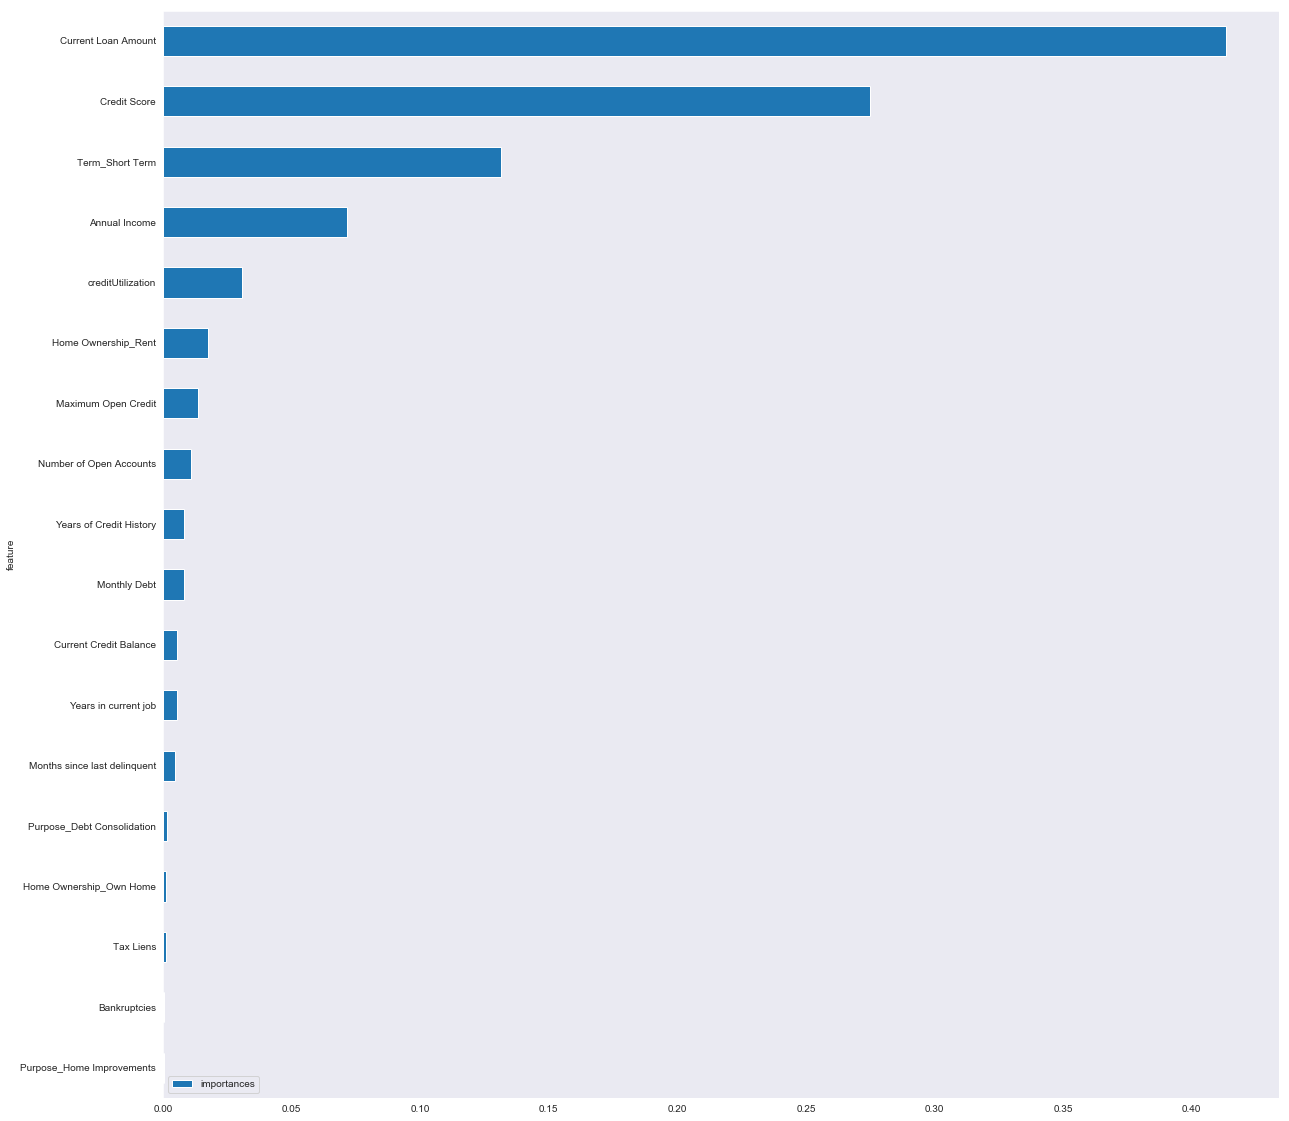

In [130]:
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
features = pd.DataFrame()
features['feature'] = x_train.columns
features['importances'] = gbk.feature_importances_
features.sort_values(by=['importances'],ascending=True,inplace=True)
features.set_index('feature',inplace=True)
features.plot(kind='barh',figsize=(20,20))

In [131]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Credit Score                    0
Years in current job            0
Annual Income                   0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
CreditProblem                   0
MedianTaxLiens                  0
creditUtilization               0
CLoanAmount_Low                 0
GroupScore_Excellent            0
GroupScore_Fair                 0
GroupScore_Good                 0
Annual Income_Low-Middle        0
Annual Income_Middle            0
Annual Income_Upper             0
Annual Income_Upper-Middle      0
Term_Short Term                 0
Home Ownership_Own Home         0
Home Ownership

In [132]:
#Gaussian NB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

37.52


In [133]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


78.9


In [134]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

62.71


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [135]:
#Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


70.68


In [136]:
#Decision trees
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

76.97


In [137]:
#Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


84.29


In [138]:
#K Neighbors
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
y_pred = kn.predict(x_val)
acc_kn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_kn)

75.75


In [139]:
#Random forest.
#STOCASTIC Gradient descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


67.46


In [140]:
#Gradient Boosting
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

79.34


In [143]:
metrics = pd.DataFrame({
    'Metric': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_kn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
metrics.sort_values(by='Score', ascending=False)

,Metric,Score
2,Random Forest,84.29
8,Gradient Boosting Classifier,79.34
1,Logistic Regression,78.90
6,Decision Tree,76.97
0,KNN,75.75
4,Perceptron,70.68
7,Stochastic Gradient Descent,67.46
5,Linear SVC,62.71
3,Naive Bayes,37.52
